In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import cv2

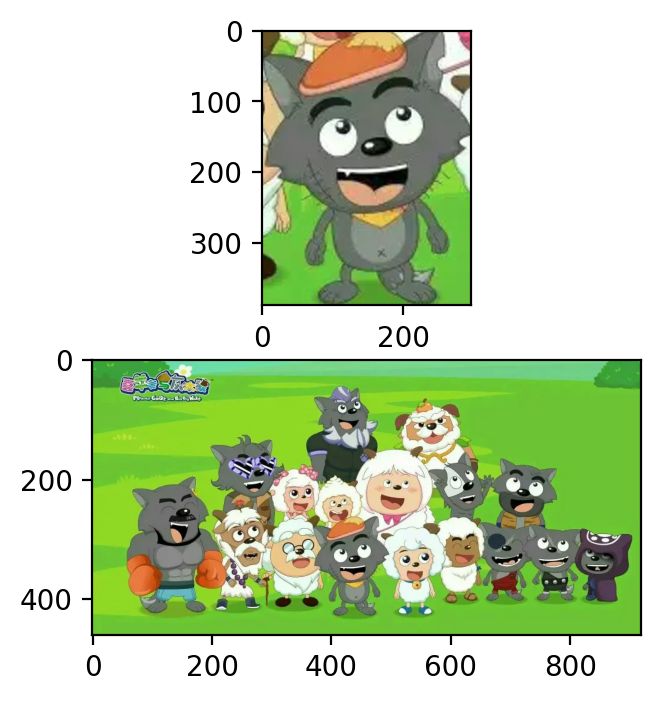

In [2]:
img1 = cv2.imread('wolf.png')
img2 = cv2.imread('group.png')
plt.figure(dpi=200)
plt.subplot(2, 1, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.subplot(2, 1, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [3]:
sift = cv2.SIFT_create()
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
start_time = time.time()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)
print('Elapsed time: %.6fs' % (time.time() - start_time))
print('Image 1 - %d feature detected' % des1.shape[0])
print('Image 2 - %d feature detected' % des2.shape[0])

Elapsed time: 0.085599s
Image 1 - 879 feature detected
Image 2 - 1886 feature detected


In [4]:
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(des1, des2, k=2)
print('%d matches' % len(matches))

879 matches


In [5]:
good_matches = []
for m, n in matches:
    if m.distance < 0.6 * n.distance:
        good_matches.append(m)
print('%d matches' % len(good_matches))

80 matches


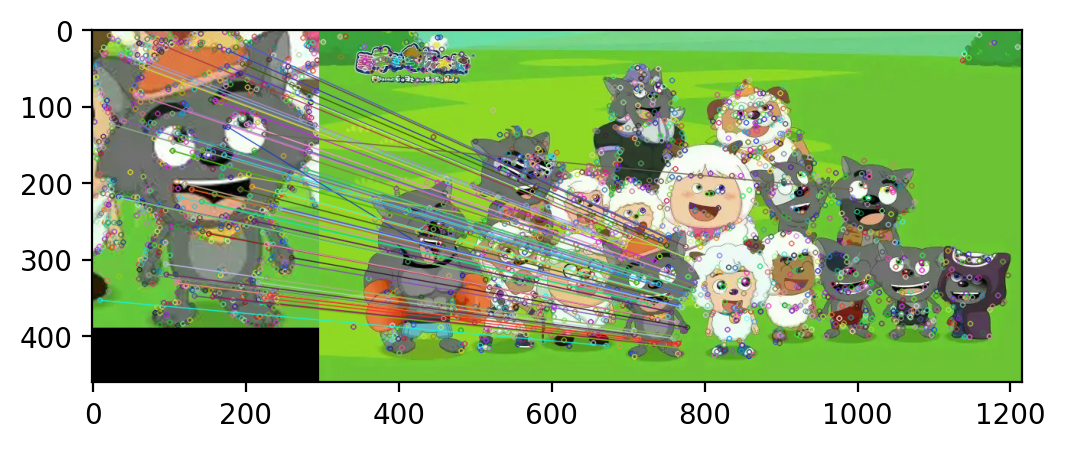

In [6]:
img3 = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None)
plt.figure(dpi=200)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

In [7]:
des1 = des1 / np.repeat(np.sum(des1, axis = 1).reshape(des1.shape[0], 1), des1.shape[1], axis=1)
des2 = des2 / np.repeat(np.sum(des2, axis = 1).reshape(des2.shape[0], 1), des2.shape[1], axis=1)
dist_mat = np.sqrt(1.0 - np.dot(np.sqrt(des1), np.sqrt(des2).transpose()))
min_arg = np.argsort(dist_mat, axis=1)
good_matches = []
for i in range(dist_mat.shape[0]):
    m, n = min_arg[i][0:2]
    if dist_mat[i][m] < dist_mat[i][n] * 0.6:
        dmatch = cv2.DMatch(i, m, 0, dist_mat[i][m])
        good_matches.append(dmatch)
print('%d matches' % len(good_matches))

78 matches


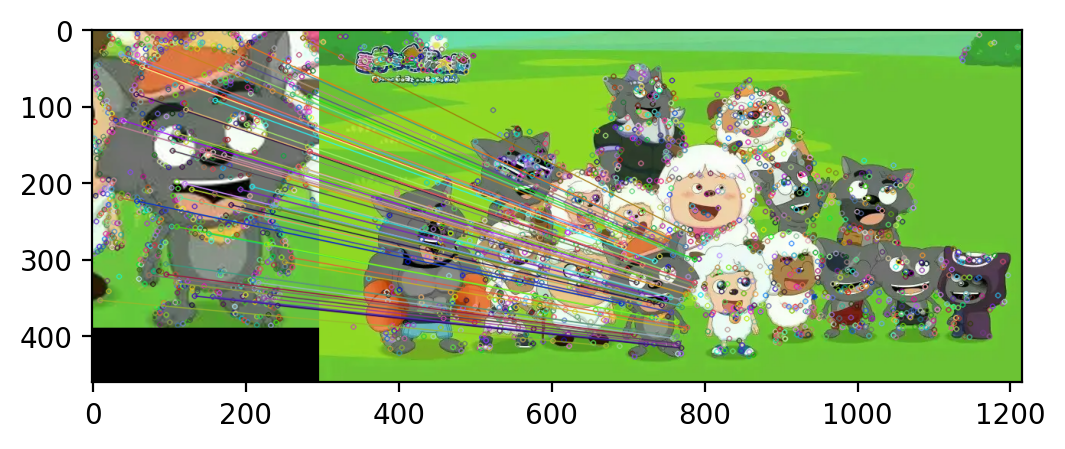

In [8]:
img4 = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None)
plt.figure(dpi=200)
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))